# 3 - Classification

# MNIST

In this chapter, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST. Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset:

In [5]:
# Load the dataset
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
# Know your data
print("Train shape: ",X_train.shape)
print("Train labels shape: ",y_train.shape)

Train shape:  (60000, 28, 28)
Train labels shape:  (60000,)


In [12]:
# Convert matrix into 1d vector
X_train=X_train.reshape(X_train.shape[0],28*28)
X_test=X_test.reshape(X_test.shape[0],28*28)
X_train.shape

(60000, 784)

There are 60,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function:

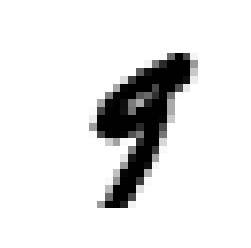

In [28]:
# Visualize the dataset
import numpy as np # For Linear Algebra

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

some_digits=X_train[36000]
some_digit_image=some_digits.reshape(28,28)

plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [29]:
# now see it's label becuase it's looking like 9
y_train[36000]

9

# Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit — for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for this classification task:

In [17]:
y_train_9=(y_train==9)
y_test_9=(y_test==9)

Okay, now let’s pick a classifier and train it. A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning), as we will see later. Let’s create an SGDClassifier and train it on the whole training set: 

In [18]:
from sklearn.linear_model import SGDClassifier

clf=SGDClassifier(random_state=42,verbose=1)
clf.fit(X_train,y_train_9)

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 6981.05, NNZs: 644, Bias: -302.874926, T: 60000, Avg. loss: 108631.136413
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4294.89, NNZs: 653, Bias: -338.337723, T: 120000, Avg. loss: 17456.241243
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 3143.47, NNZs: 655, Bias: -359.084859, T: 180000, Avg. loss: 10262.510971
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 2561.98, NNZs: 657, Bias: -373.022911, T: 240000, Avg. loss: 7306.088183
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 2161.25, NNZs: 657, Bias: -384.204933, T: 300000, Avg. loss: 5733.290832
Total training time: 0.40 seconds.


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=1, warm_start=False)

In [19]:
clf.predict([some_digits])

array([ True])

# Performance Measures
Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend a large part on this topic. There are many performance measures available, so grab another coffee and get ready to learn many new concepts and acronyms!

# Measuring Accuracy Using Cross-Validation

Occasionally you will need more control over the cross-validation process than what cross_val_score() and similar functions provide. In these cases, you can implement cross-validation yourself; it is actually fairly straightforward. The following code does roughly the same thing as the preceding cross_val_score() code, and prints the same result:


In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3,random_state=42)

for train_index,test_index in skfolds.split(X_train,y_train_9):
    clone_clf=clone(clf)
    X_train_folds=X_train[train_index]
    y_train_folds=(y_train_5[train_index])
    X_test_fold=X_train[test_index]
    y_test_fold=(y_train_9[test_index])
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 10513.34, NNZs: 612, Bias: 26.948553, T: 40000, Avg. loss: 131935.324346
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 6636.28, NNZs: 625, Bias: 37.746268, T: 80000, Avg. loss: 21129.787463
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 5050.36, NNZs: 636, Bias: 43.052248, T: 120000, Avg. loss: 11950.046402
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 4021.91, NNZs: 638, Bias: 47.304959, T: 160000, Avg. loss: 8583.798270
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 3420.88, NNZs: 640, Bias: 49.848893, T: 200000, Avg. loss: 6588.907378
Total training time: 0.27 seconds.
0.8312


c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 10491.72, NNZs: 625, Bias: 37.992691, T: 40000, Avg. loss: 122978.293374
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 6453.73, NNZs: 633, Bias: 46.026652, T: 80000, Avg. loss: 19345.632035
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 4860.18, NNZs: 640, Bias: 51.999817, T: 120000, Avg. loss: 11215.656011
Total training time: 0.20 seconds.
-- Epoch 4
Norm: 3985.65, NNZs: 642, Bias: 55.170961, T: 160000, Avg. loss: 7975.189554
Total training time: 0.27 seconds.
-- Epoch 5
Norm: 3349.37, NNZs: 642, Bias: 58.113265, T: 200000, Avg. loss: 6143.900705
Total training time: 0.34 seconds.
0.8032


c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 11002.42, NNZs: 611, Bias: 22.267291, T: 40000, Avg. loss: 132184.472463
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 6801.83, NNZs: 622, Bias: 28.966176, T: 80000, Avg. loss: 19161.326045
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 5111.56, NNZs: 625, Bias: 33.101186, T: 120000, Avg. loss: 10972.341233
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 4216.68, NNZs: 626, Bias: 34.419805, T: 160000, Avg. loss: 7817.176098
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 3616.83, NNZs: 631, Bias: 35.972026, T: 200000, Avg. loss: 5990.735092
Total training time: 0.27 seconds.
0.8291


The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class. At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on the test fold. Then it counts the number of correct predictions and outputs the ratio of correct predictions.

Let’s use the cross_val_score() function to evaluate your SGDClassifier model using K-fold cross-validation, with three folds. Remember that K-fold cross-validation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds 

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train,y_train_9,cv=3,scoring='accuracy')


c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 9744.09, NNZs: 606, Bias: -243.279424, T: 40000, Avg. loss: 144038.320887
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 5791.49, NNZs: 630, Bias: -280.059684, T: 80000, Avg. loss: 25756.420465
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 4360.02, NNZs: 644, Bias: -301.434471, T: 120000, Avg. loss: 15138.878088
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3639.78, NNZs: 647, Bias: -316.002481, T: 160000, Avg. loss: 10691.188258
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 3048.15, NNZs: 648, Bias: -327.498073, T: 200000, Avg. loss: 8420.847796
Total training time: 0.27 seconds.


c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 9271.30, NNZs: 638, Bias: -232.903683, T: 40000, Avg. loss: 144476.404033
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 5657.43, NNZs: 646, Bias: -267.791292, T: 80000, Avg. loss: 25850.212345
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 4247.35, NNZs: 649, Bias: -287.659562, T: 120000, Avg. loss: 15020.351017
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3421.51, NNZs: 655, Bias: -300.954087, T: 160000, Avg. loss: 10631.251838
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 2920.11, NNZs: 656, Bias: -311.911347, T: 200000, Avg. loss: 8272.580611
Total training time: 0.29 seconds.


c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 9437.50, NNZs: 619, Bias: -233.017087, T: 40000, Avg. loss: 150306.462659
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 5856.32, NNZs: 632, Bias: -271.473369, T: 80000, Avg. loss: 26328.553943
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 4485.43, NNZs: 642, Bias: -292.190335, T: 120000, Avg. loss: 15509.859851
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3526.77, NNZs: 644, Bias: -306.109787, T: 160000, Avg. loss: 11011.183009
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 3037.19, NNZs: 652, Bias: -317.565550, T: 200000, Avg. loss: 8419.210783
Total training time: 0.27 seconds.


array([0.93685, 0.9545 , 0.94935])

Wow! Above 95% accuracy (ratio of correct predictions) on all cross-validation folds? This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very dumb classifier that just classifies every single image in the “not-5” class:


In [24]:
from sklearn.base import BaseEstimator

class Never9Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [30]:
# Can you guess model accuracy? Let's find out
never_9_clf=Never5Classifier()
cross_val_score(never_9_clf,X_train,y_train_9,cv=3,scoring='accuracy')

array([0.8993 , 0.8999 , 0.90335])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. Beats Nostradamus. 

This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

# Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set, but let’s keep it untouched for now (remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch). Instead, you can use the cross_val_predict() function:


In [31]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(clf,X_train,y_train_9,cv=3)

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 9744.09, NNZs: 606, Bias: -243.279424, T: 40000, Avg. loss: 144038.320887
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 5791.49, NNZs: 630, Bias: -280.059684, T: 80000, Avg. loss: 25756.420465
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 4360.02, NNZs: 644, Bias: -301.434471, T: 120000, Avg. loss: 15138.878088
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3639.78, NNZs: 647, Bias: -316.002481, T: 160000, Avg. loss: 10691.188258
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 3048.15, NNZs: 648, Bias: -327.498073, T: 200000, Avg. loss: 8420.847796
Total training time: 0.27 seconds.


c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 9271.30, NNZs: 638, Bias: -232.903683, T: 40000, Avg. loss: 144476.404033
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 5657.43, NNZs: 646, Bias: -267.791292, T: 80000, Avg. loss: 25850.212345
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 4247.35, NNZs: 649, Bias: -287.659562, T: 120000, Avg. loss: 15020.351017
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3421.51, NNZs: 655, Bias: -300.954087, T: 160000, Avg. loss: 10631.251838
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 2920.11, NNZs: 656, Bias: -311.911347, T: 200000, Avg. loss: 8272.580611
Total training time: 0.27 seconds.


c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 9437.50, NNZs: 619, Bias: -233.017087, T: 40000, Avg. loss: 150306.462659
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 5856.32, NNZs: 632, Bias: -271.473369, T: 80000, Avg. loss: 26328.553943
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 4485.43, NNZs: 642, Bias: -292.190335, T: 120000, Avg. loss: 15509.859851
Total training time: 0.20 seconds.
-- Epoch 4
Norm: 3526.77, NNZs: 644, Bias: -306.109787, T: 160000, Avg. loss: 11011.183009
Total training time: 0.27 seconds.
-- Epoch 5
Norm: 3037.19, NNZs: 652, Bias: -317.565550, T: 200000, Avg. loss: 8419.210783
Total training time: 0.34 seconds.


Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training). 

Now you are ready to get the confusion matrix using the confusion_matrix() function. Just pass it the target classes (y_train_5) and the predicted classes (y_train_pred): 

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9,y_train_pred)

array([[52841,  1210],
       [ 1976,  3973]], dtype=int64)

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. The first row of this matrix considers non-9 images (the negative class): 52,841 of them were correctly classified as non-9s (they are called true negatives), while the remaining 1,210 were wrongly classified as 9s (false positives). The second row considers the images of 9s (the positive class): 1,976 were wrongly classified as non-9s (false negatives), while the remaining 3,973 were correctly classified as 9s (true positives). A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right).

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier:

<img src='precision.PNG'>

TP is the number of true positives, and FP is the number of false positives.

A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one positive instance. So precision is typically used along with another metric named recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier :

<img src='recall.PNG'>

FN is of course the number of false negatives.

# Precision and Recall

Scikit-Learn provides several functions to compute classifier metrics, including precision and recall:

<

In [37]:
from sklearn.metrics import precision_score,recall_score
print("Precision Score: ",precision_score(y_train_9,y_train_pred))
print("Recall Score: ",recall_score(y_train_9,y_train_pred))

Precision Score:  0.766544472313332
Recall Score:  0.6678433350142882


Now your 9-detector does not took as shinu as it did when you looked at it's accuracy. When it claims an image represents a 9, it is correct only 76% of the time. Moreover, it only detects 66% of 9s.

It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall (given equation below). Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high. 

<img src='F1_score.PNG'>


In [39]:
# To Compute the F1 score, simply call the f1_score() function
from sklearn.metrics import f1_score
f1_score(y_train_9,y_train_pred)

0.713798059647862

The F1 score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall. For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your product (in such cases, you may even want to add a human pipeline to check the classifier’s video selection). On the other hand, suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the precision/recall tradeoff.

# Precision/Recall Tradeoff

To understand this tradeoff, let’s look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class. 
shows a few digits positioned from the lowest score on the left to the highest score on the right. Suppose the decision threshold is positioned at the central arrow (between the two 5s): you will find 4 true positives (actual 5s) on the right of that threshold, and one false positive (actually a 6). Therefore, with that threshold, the precision is 80% (4 out of 5). But out of 6 actual 5s, the classifier only detects 4, so the recall is 67% (4 out of 6). Now if you raise the threshold (move it to the arrow on the right), the false positive (the 6) becomes a true negative, thereby increasing precision (up to 100% in this case), but one true positive becomes a false negative, decreasing recall down to 50%. Conversely, lowering the threshold increases recall and reduces precision.

<img src='precision_recall_tradeoff.PNG'>

Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance, and then make predictions based on those scores using any threshold you want:


In [42]:
y_score=clf.decision_function([some_digits])
print(y_score)

# set threshold
threshold=0
y_some_digit_pred=(y_score > threshold)
print(y_some_digit_pred)

[13625.40971728]
[ True]


The SGDClassifier uses a threshold equal to 0, so the previous code returns the same result as the predict() method (i.e., True). Let’s raise the threshold: 

In [43]:
threshold=20000
y_some_digit_pred=(y_score>threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 200,000. 

So how can you decide which threshold to use? For this you will first need to get the scores of all instances in the training set using the cross_val_predict() function again, but this time specifying that you want it to return decision scores instead of predictions:

In [44]:
y_score=cross_val_predict(clf,X_train,y_train_9,cv=3,method='decision_function')

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 9744.09, NNZs: 606, Bias: -243.279424, T: 40000, Avg. loss: 144038.320887
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 5791.49, NNZs: 630, Bias: -280.059684, T: 80000, Avg. loss: 25756.420465
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 4360.02, NNZs: 644, Bias: -301.434471, T: 120000, Avg. loss: 15138.878088
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3639.78, NNZs: 647, Bias: -316.002481, T: 160000, Avg. loss: 10691.188258
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 3048.15, NNZs: 648, Bias: -327.498073, T: 200000, Avg. loss: 8420.847796
Total training time: 0.27 seconds.


c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 9271.30, NNZs: 638, Bias: -232.903683, T: 40000, Avg. loss: 144476.404033
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 5657.43, NNZs: 646, Bias: -267.791292, T: 80000, Avg. loss: 25850.212345
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 4247.35, NNZs: 649, Bias: -287.659562, T: 120000, Avg. loss: 15020.351017
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3421.51, NNZs: 655, Bias: -300.954087, T: 160000, Avg. loss: 10631.251838
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 2920.11, NNZs: 656, Bias: -311.911347, T: 200000, Avg. loss: 8272.580611
Total training time: 0.27 seconds.


c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 9437.50, NNZs: 619, Bias: -233.017087, T: 40000, Avg. loss: 150306.462659
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 5856.32, NNZs: 632, Bias: -271.473369, T: 80000, Avg. loss: 26328.553943
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 4485.43, NNZs: 642, Bias: -292.190335, T: 120000, Avg. loss: 15509.859851
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 3526.77, NNZs: 644, Bias: -306.109787, T: 160000, Avg. loss: 11011.183009
Total training time: 0.28 seconds.
-- Epoch 5
Norm: 3037.19, NNZs: 652, Bias: -317.565550, T: 200000, Avg. loss: 8419.210783
Total training time: 0.35 seconds.


Now with these scores you can compute precision and recall for all possible thresholds using the
precision_recall_curve() function:

In [45]:
from sklearn.metrics import precision_recall_curve
precision,recalls,threshold=precision_recall_curve(y_train_9,y_score)

Finally, you can plot precision and recall as functions of the threshold value using Matplotlib 

In [48]:
def plot_precision_recall_vc_threshold(precision,recalls,thresholds):
    plt.plot(thresholds,precision[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

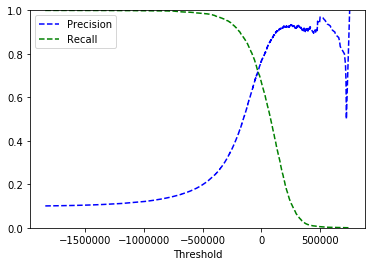

In [49]:
plot_precision_recall_vc_threshold(precision=precision,recalls=recalls,thresholds=threshold)
plt.show()

You can see that precision really starts to fall sharply around 80% recall. You will probably want to select a precision/recall tradeoff just before that drop — for example, at around 60% recall. But of course the choice depends on your project.

So let’s suppose you decide to aim for 90% precision. You look up the first plot (zooming in a bit) and find that you need to use a threshold of about 70,000. To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can just run this code:


In [51]:
y_train_pred_90=(y_score>70000)

# Let's check these prediction precision and recall
print("Precision score: ",precision_score(y_train_9,y_train_pred_90))
print("Recall score: ",recall_score(y_train_9,y_train_pred_90))

Precision score:  0.8537658053875756
Recall score:  0.52210455538746


Great, you have a 85% precision classifier (or close enough)! As you can see, it is fairly easy to create a classifier with virtually any precision you want: just set a high enough threshold, and you’re done. Hmm, not so fast. A high-precision classifier is not very useful if its recall is too low!

# The ROC Curve
The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity. 

To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the roc_curve() function:


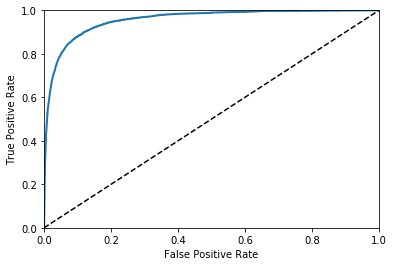

In [56]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_9,y_score=y_score)

# Then you can plot the FPR against the TPR using Matplotlib.
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.axis([0,1,0,1])
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

Once again there is a tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC:

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_9,y_score)

0.9563577756834807

In [58]:
# Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_9,cv=3,method='predict_proba')

In [60]:
# But to plot a ROC curve, you need scores, not probabilities.
# A simple solution is to use the positive class’s probability as the score:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,threshold_forest=roc_curve(y_train_9,y_scores_forest)

Now you are ready to plot the ROC Curve. It is useful to plot the first ROC curve as well to see how they compare

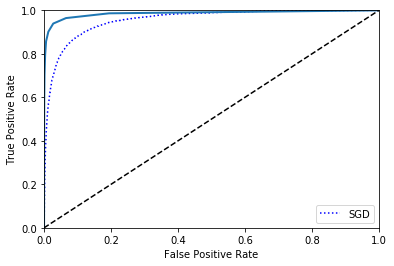

In [62]:
plt.plot(fpr,tpr,"b:",label="SGD")
plt.plot(fpr_forest,tpr_forest,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.axis([0,1,0,1])
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

As you can see in above figure, the RandomForestClassifier’s ROC curve looks much better than the SGDClassifier’s: it comes much closer to the top-left corner. As a result, its ROC AUC score is also significantly better:

In [64]:
roc_auc_score(y_train_9,y_scores_forest)

0.9860076662746303

Hopefully you now know how to train binary classifiers, choose the appropriate metric for your task, evaluate your classifiers using cross-validation, select the precision/recall tradeoff that fits your needs, and compare various models using ROC curves and ROC AUC scores. Now let’s try to detect more than just the 9s.